# Introduction

The dataset used include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records. The dataset source is UCI Machine Learning Repository (https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
import numpy as np
from keras import models
from keras import layers
from keras import optimizers

# Data

The dataset is composed by the following features:

* **Gender**: gender of the individual.
* **Age**: age of the individual.
* **Height**: height of the individual.
* **Weight**: weight of the individual.
* **FamiliyHistoryWithOverweight**: Has a family member suffered or suffers from overweight?
* **FAVC**: Does the individual eat high caloric food frequently?
* **FCVC**: Does the individual usually eat vegetables in your meals?
* **NCP**: How many main meals does the individual have daily?
* **CAEC**: Does the individual eat any food between meals?
* **SMOKE**: Does the individual smoke?
* **CH20**: How much water does the individual drink daily?
* **SCC**: Does the individual monitor the calories eaten daily?
* **FAF**: 	How often the individual has physical activity?
* **TUE**: How much time does the individual use technological devices such as cell phone, videogames, television, computer and others?
* **CALC**: How often does the individual drink alcohol?
* **MTRANS**: Which transportation does the individual usually use?
* **NObeyesdad**: Obesity level

The 80% of the data (1688 records) will be used for training and validation, and the remaining 20% (423 records) for test.

In [2]:
# Read CSV file with the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

## Dataset transformation

The dataset is divided in inputs and just one output:

* **Inputs**:
    * Gender
    * Age
    * Height
    * Weight
    * FamiliyHistoryWithOverweight
    * FAVC
    * FCVC
    * NCP
    * CAEC
    * SMOKE
    * CH20
    * SCC
    * FAF
    * TUE
    * CALC
    * MTRANS
* **Output**
    * NObeyesdad

The output NObeyesdad allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. As the predicted variable must be a real value (float or double) this value will be replaced by the corresponding BMI.

The Body Mass Index (BMI) is a simple calculation using a person's height and weight. The formula is (BMI = weight / height^2) (kg/m²). It is used as an indicator of whether an individual is underweight, normal weight, overweight, or obese. The correspondance from the previous categorical values to the new numerical ones are:

* **Insufficient Weight (Underweight)**: BMI less than 18.5
* **Normal Weight**: BMI between 18.5 and 24.9
* **Overweight Level I (Pre-obesity)**: BMI between 25 and 29.9
* **Overweight Level II**: BMI between 30 and 34.9
* **Obesity Type I**: BMI between 35 and 39.9
* **Obesity Type II**: BMI between 40 and 44.9
* **Obesity Type III**: BMI 45 and above

In [3]:
# Loop through each row and replace the column NObeyesdad value by the BMI correspondant value
for index, row in df.iterrows():
    df.at[index, 'NObeyesdad'] = round(df.at[index, 'Weight'] / (df.at[index, 'Height']**2), 2)

# Save the updated Dataset back to a CSV file 
df.to_csv('ObesityDataSet_raw_and_data_sinthetic_updated.csv', index=False)

# Update the read CSV file with the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic_updated.csv')

## Dataset checks

The data will be checked for the following points:

* Check for missing values
* Check for duplicates
* Check data type
* Check unique values on each column
* Check statistics

### Check missing values

No missing values found as there are no fields with a null value.

In [4]:
# Check missing values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### Check duplicates

24 records are duplicated. This means that the dataset contains information about 24 individuals that have exactly the same features. In this case, this duplicates are kept because it is assumed that they represent legitimate repeated records from different people.

In [5]:
# Check duplicates
print(df.duplicated().sum())

24


### Check data types

Check data types allows to make a first sight to know which features are numerical and which are categorical. This will help in the further pre-processing steps to know which fields must be transformed/normalized. In this case the features are:

* **Gender**: Categorical.
* **Age**: Numerical.
* **Height**: Numerical.
* **Weight**: Numerical.
* **FamiliyHistoryWithOverweight**: Categorical.
* **FAVC**: Categorical.
* **FCVC**: Numerical.
* **NCP**: Numerical.
* **CAEC**: Categorical.
* **SMOKE**: Categorical.
* **CH2O**: Numerical.
* **SCC**: Categorical.
* **FAF**: 	Numerical.
* **TUE**: Numerical.
* **CALC**: Categorical.
* **MTRANS**: Categorical.
* **NObeyesdad**: Numerical.

In [6]:
#Check datatypes
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                        float64
dtype: object

### Check unique values on each column

Understanding the range of unique values in categorical variables will help in choosing the right encoding techniques.

In [7]:
# Check the number of unique values on each column
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                        1340
dtype: int64

### Check statistics

In [8]:
#Check statistics of data set
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866,29.700137
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927,8.011354
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,13.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000,24.325000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350,28.720000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000,36.015000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.810000


To know more insights of the dataset, the features are separated in two different groups: Categorical and Numerical. From the previous analysis it is known which feature corresponds to each group.

* **Categorical**: Gender, FamiliyHistoryWithOverweigth, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS
* **Numerical**: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE, NObeyesdad

In [9]:
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

for feature in categorical_features:
    print(f"Category in {feature} is : {df[feature].unique()}")

Category in Gender is : ['Female' 'Male']
Category in family_history_with_overweight is : ['yes' 'no']
Category in FAVC is : ['no' 'yes']
Category in CAEC is : ['Sometimes' 'Frequently' 'Always' 'no']
Category in SMOKE is : ['no' 'yes']
Category in SCC is : ['no' 'yes']
Category in CALC is : ['no' 'Sometimes' 'Frequently' 'Always']
Category in MTRANS is : ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


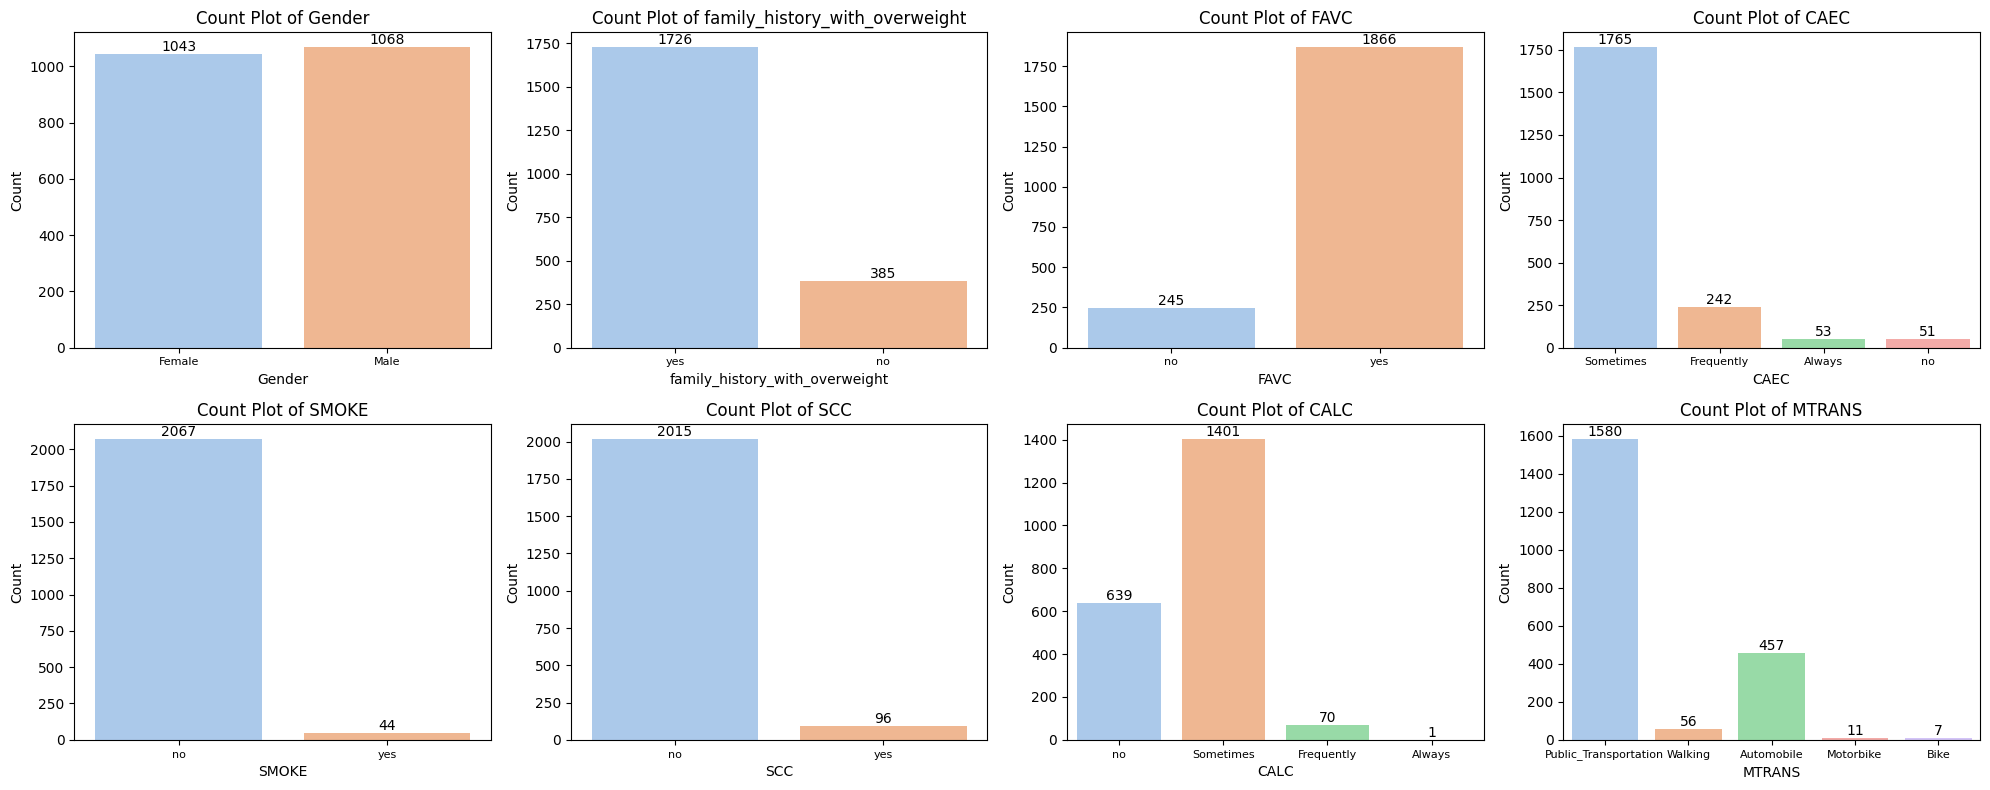

In [10]:
# Distribution of Categorical Features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 8))
axes = axes.ravel()
for idx, feature in enumerate(categorical_features):
    sns.countplot(x=df[feature], data=df, ax=axes[idx], palette='pastel', hue=feature, legend=False)
    for container in axes[idx].containers:
        axes[idx].bar_label(container, color='black', size=10)
    axes[idx].set_title('Count Plot of ' + str(feature))
    axes[idx].set_xlabel(feature)
    axes[idx].tick_params(axis='x', labelsize=8)
    axes[idx].set_ylabel('Count')
plt.tight_layout()
plt.show()

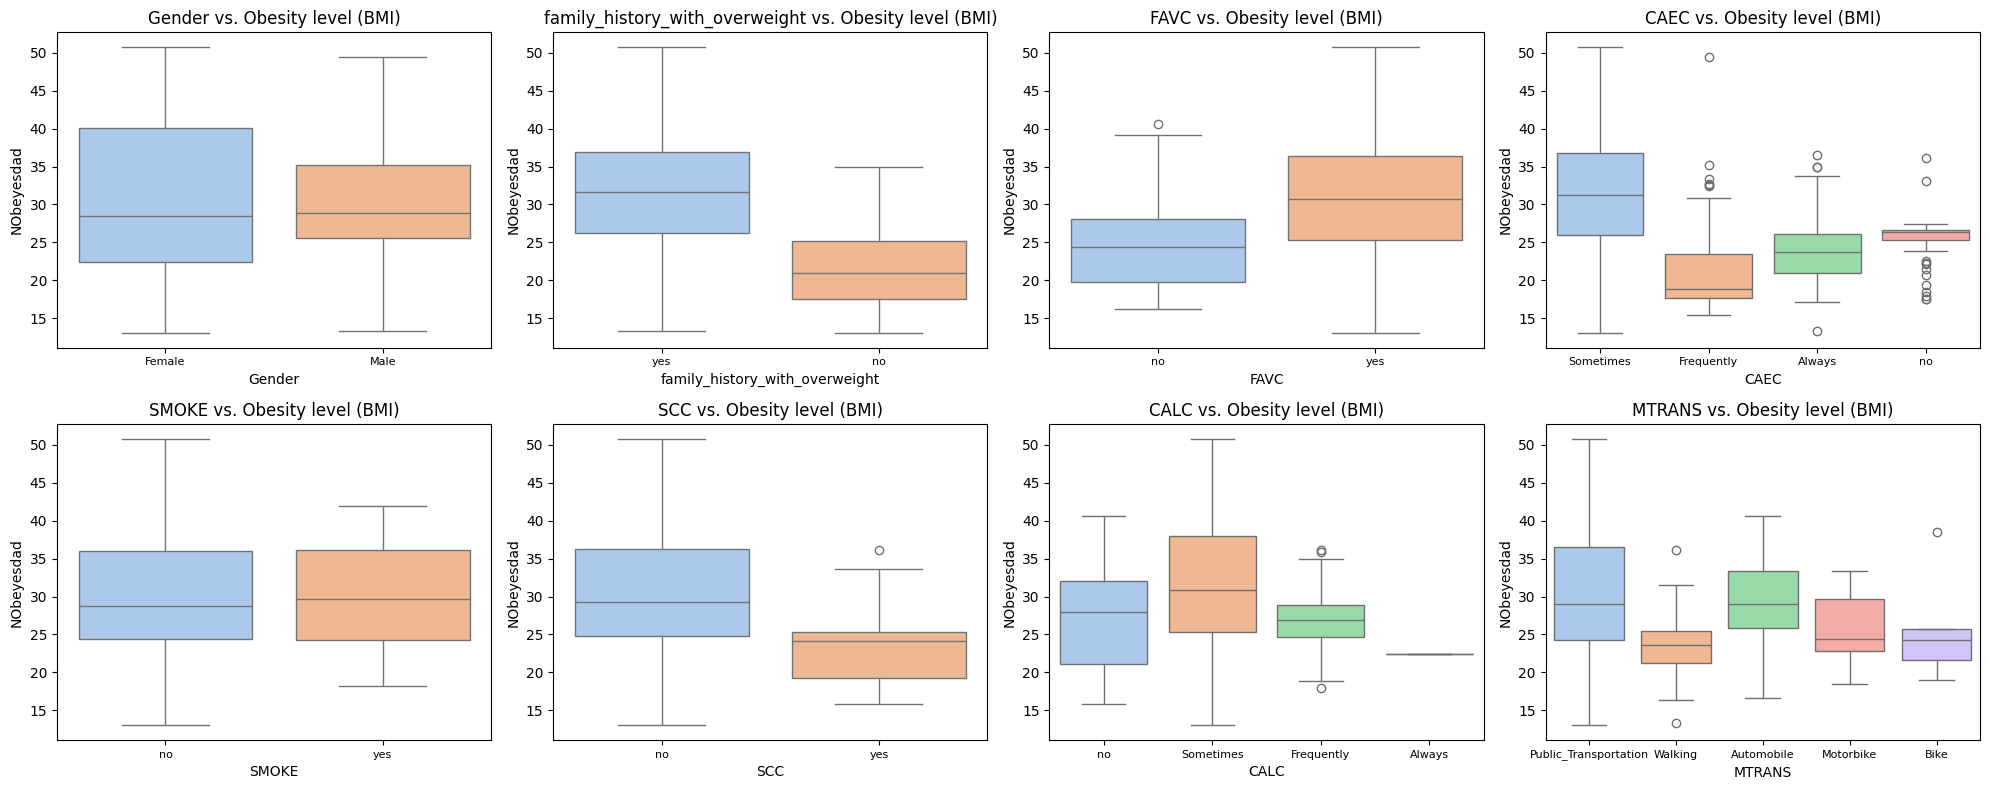

In [11]:
# Categorical Feature vs. Obesity level BMI
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
plt.figure(figsize=(20, 8))
for idx, feature in enumerate(categorical_features):
    plt.subplot(2, 4, idx + 1)
    sns.boxplot(data=df, x=feature, y='NObeyesdad', palette='pastel', hue=feature, legend=False)
    plt.title(str(feature) + ' vs. Obesity level (BMI)')
    plt.tick_params(axis='x', labelsize=8)
plt.tight_layout()
plt.show()

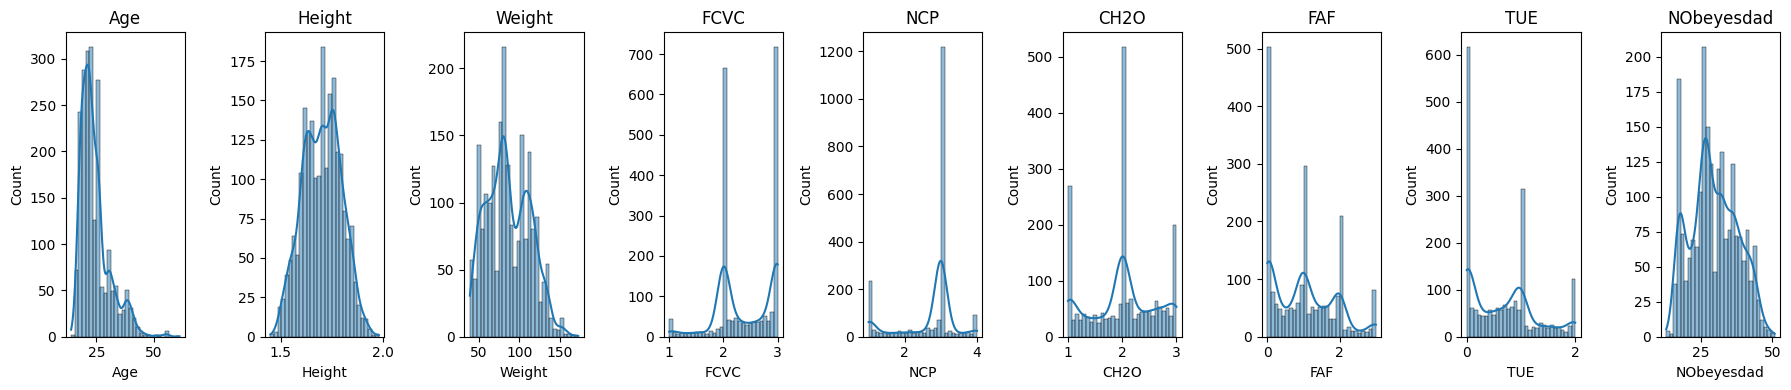

In [12]:
# Distribution of Numerical Features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']

plt.figure(figsize=(18, 4))
for idx, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), idx + 1)
    sns.histplot(data=df[feature], bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

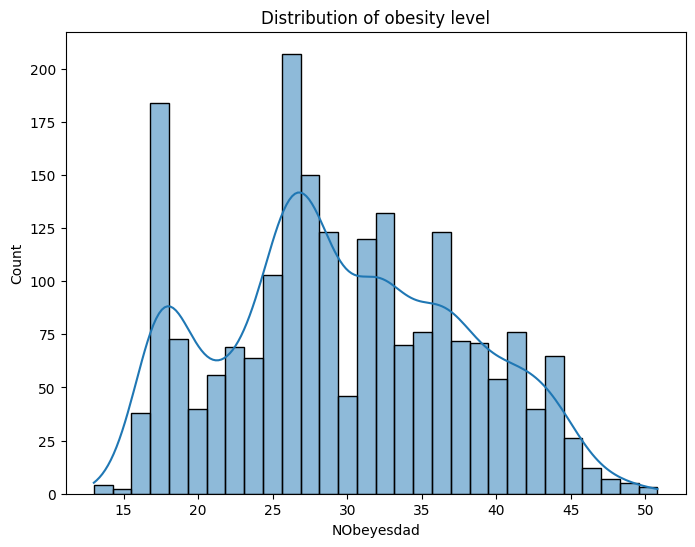

In [13]:
# Obesity level Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['NObeyesdad'], bins=30, kde=True)
plt.title('Distribution of obesity level')
plt.show()

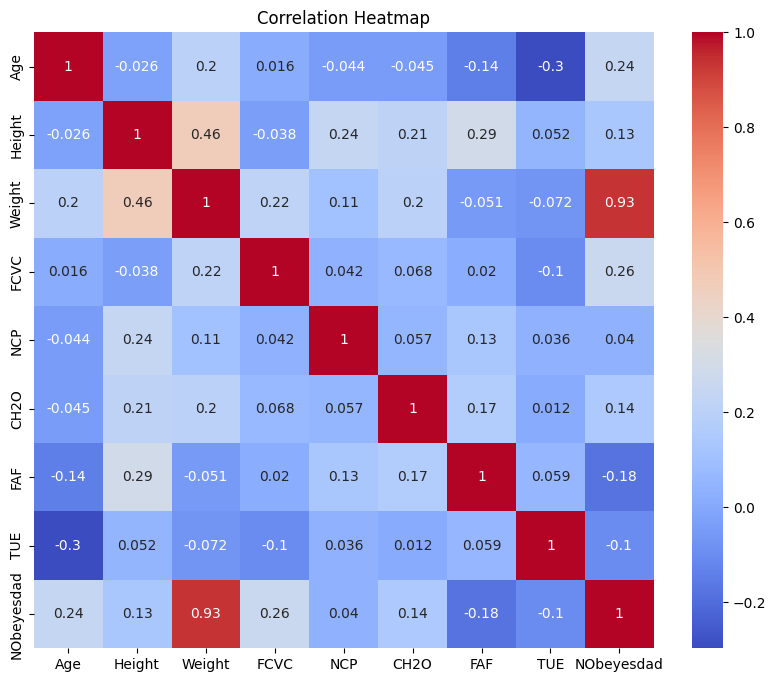

In [14]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Analysis results

1. **Dataset structure**
    1. It counts with 2111 records (rows) and 17 features (columns).
    3. The features of each record are considered unique even if some of them are duplicated as commented before.
    4. No null values found.
2. **Minimum and maximum values**
    1. The individuals height are in a range of [1.45, 1.98] m.
    2. The individuals weight are in a range of [39.0, 173.0] kg.
    3. The individuals ingest of vegetables are in a range [1, 3] pieces of vegetables per day.
    4. The individuals number of main meals are in a range [1, 4] main meals per day.
    5. The individuals drink water in a range [1, 3] l of water per day.
    6. The individuals practice sports in a range [0, 3] hours per day.
    7. The individuals uses technological devices in a range [0, 2] hours per day.
    8. The individuals have a BMI in a range of [13.0, 50.81] kg/m^2.
3. **Data distribution**
    1. The highest variability is found in the features: age, weight and obesity level.
    2. The averages are close to the percentile 50% showing an equally distributed data.
4. **Obesity level**
    1. Facts about numerical features:
        1. The individuals have a BMI in a range of [13.0, 50.81] kg/m^2.
        2. The average obesity level is 29.7 which corresponds to Overweight Level I close to the limit to Overweight Level II.
        3. The obesity level has a high variability.
        4. The 25% of the individuals are in the obesity level normal values (BMI<25).
        5. The highest impact in the obesity level is from the features (decreasing order of impact): Weight, FCVC, Age, CH20 and Height.
    2. Facts about categorical features:
        1. Males tends to have higher level of obesity.
        2. High caloric diets implies higher level of obesity.
        3. Smoking does not seem to have impact in the obesity level.
        4. Inidividuals who controls the calories consumed tends to have lower obesity levels.
        5. Individuals who uses transportation method like walking or bike tends to have lower obesity levels.


## Data preprocessing

The data is splitted in two different datasets, the training and test datasets. The training dataset contains the 16 input features stated before while the test data set only contains the output fetaure NObeyesdad=Obesity level. The datasets are created from the main dataset with 2111 records and it is splitted such 80% of the records (1688) are in the train set and the 20% remaining (423) are in the test set.

The following categorical features has been adjusted for integer values, this is suitable because the categorical features in the dataset have an inherent order (low, medium, high etc.) or the features are binary which can be converted from the 2 binary values to 0 and 1, which is a straightforward and effective change.

* **Gender**: Categorical.
* **FamiliyHistoryWithOverweight**: Categorical.
* **FAVC**: Categorical.
* **CAEC**: Categorical.
* **SMOKE**: Categorical.
* **SCC**: Categorical.
* **CALC**: Categorical.
* **MTRANS**: Categorical.

The following numerical values has been normalized. This is important to improve convergence speed and accuracy, preventing feature dominance and improving interpretability.

* **Age**: Numerical.
* **Height**: Numerical.
* **Weight**: Numerical.
* **FCVC**: Numerical.
* **NCP**: Numerical.
* **CH2O**: Numerical.
* **FAF**: 	Numerical.
* **TUE**: Numerical.
* **NObeyesdad**: Numerical.

In [15]:
# Categorical Features
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
# Numerical Features
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']

# Encoding categorical features to have integer values
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Scale numerical features to have a mean of 0 and a standard deviation of 1
scaler = MinMaxScaler() 
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Save the updated Dataset back to a CSV file 
df.to_csv('ObesityDataSet_raw_and_data_sinthetic_processed.csv', index=False)

In [16]:
# Read CSV file with the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic_processed.csv')

# Separate the data into inputs
x, y = df.drop(['NObeyesdad'], axis=1), df[["NObeyesdad"]]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# Load your data (example assumes pandas DataFrames)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test  = x_test.to_numpy()
y_test  = y_test.to_numpy()

# Scale data if needed
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
y_train = (y_train - y_train.min()) / (y_train.max() - y_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())
y_test = (y_test - y_test.min()) / (y_test.max() - y_test.min())

# Print the training and testing sets shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1688, 16) (1688, 1)
(423, 16) (423, 1)


# Imeplementation of BP

The BP Python module defines activation functions, their derivatives, and the NeuralNet class, that imeplements a neural network using back propagation.

## Activation Functions
Activation functions introduce non-linearity in neural networks, essential for learning complex patterns. The module includes:

1. **Sigmoid**
2. **ReLU (Rectified Linear Unit)**
3. **Leaky ReLU**: Similar to ReLU but allows small gradients for negative inputs with a slope.
4. **Tanh (Hyperbolic Tangent)**
5. **Linear**

## Neural Network Class NeuralNet
This class implements a neural network with support for various activation functions and backpropagation.

### Attributes
- **Network Structure**: Input layers, a list specifying the number of neurons in each layer.
- **Other parameters**: Inputs epochs, learning_rate, and momentum.
- **Activation function**: Input fact allows to select the activation function.

### Methods
1. **_select_activation_function()** and **_select_derivative_activation_function()**:
   - Dynamically select the appropriate activation function and its derivative based on the fact parameter.
2. **forward_propagation()**:
   - Pass input data through the network layer by layer, applying weights, thresholds, and activation functions.
3. **backward_propagation()**:
   - Calculate the output error and propagate it backward through the network.
   - Update weights and thresholds using gradient descent with momentum.
4. **fit() and _train()**:
   - Normalize input data and train the network using mini-batch gradient descent.
   - Compute loss periodically for monitoring.
5. **predict()**:
   - Perform a forward pass on unseen data to generate predictions.
6. **loss_epochs()**:
   - Returns the training error for each epochs.

### Usage
The class can be used to:
1. Create a neural network with a specified architecture.
2. Train it on labeled data using fit().
3. Make predictions on new data with predict().

In [95]:
# Import Back-Propagation implementation module
import BP

# Initialize and train the neural network
bp_nn = BP.NeuralNet(layers=[16, 4, 1], epochs=1000, learning_rate=0.1, momentum=0.1, fact='tanh')
bp_nn.fit(x_train, y_train)

# Test the network
bp_predictions = bp_nn.predict(x_test)

# Compare results using three models (BP, BP-F MLR-F)

The 3 different models are compared: BP, BP-F MLR-F. For this each method is implemented using different technologies:

1. BP: own implementation
2. BP-F: using keras
3. MLR-F: using scikit-learn

For each model the following information is obtained:

1. Mean squared error MSE
2. Mean abosulte error MAE
3. Mean absolute percentage error MAPE
4. Scatter plot of the real y vs the y predicted by the model
5. Line plot of the trainig error and validation error evolution over the epochs

## BP-F model using keras

In [ ]:
# Create the neural network model
bpf_nn = models.Sequential()
# Input layer to hidden layer
bpf_nn.add(layers.Dense(4, input_dim=16, activation='relu'))  
# Hidden layer to output layer
bpf_nn.add(layers.Dense(1, activation='relu'))  

# Compile the model
bpf_optimizer = optimizers.SGD(learning_rate=0.001)
bpf_nn.compile(loss='mean_squared_error', optimizer=bpf_optimizer)

# Train the model
bpf_nn.fit(x_train, y_train, epochs=1000, verbose=0)

# Make predictions
bpf_predictions = bpf_nn.predict(x_test)

## MLR-F model using scikit-learn

In [19]:
# Create an MLP for regression
nn_mlrf = MLPRegressor(hidden_layer_sizes=(16, 4), max_iter=1000)

# Fit the model
nn_mlrf.fit(x_train, y_train.ravel())

# Make predictions
mlrf_predictions = nn_mlrf.predict(x_test)

## Evaluation metrics

### MSE - Mean squared error

In [96]:
bp_mse = mean_squared_error(y_test, bp_predictions)
bpf_mse = mean_squared_error(y_test, bpf_predictions)
mlrf_mse = mean_squared_error(y_test, mlrf_predictions)
print(f'Mean Squared Error BP: {bp_mse}')
print(f'Mean Squared Error BP-F: {bpf_mse}')
print(f'Mean Squared Error MLR-F: {mlrf_mse}')

Mean Squared Error BP: 0.029414417349727846
Mean Squared Error BP-F: 0.025877322896177366
Mean Squared Error MLR-F: 0.00498531169825532


### MAE - Mean absolute error

In [97]:
bp_mae = mean_absolute_error(y_test, bp_predictions)
bpf_mae = mean_absolute_error(y_test, bpf_predictions)
mlrf_mae = mean_absolute_error(y_test, mlrf_predictions)
print(f'Mean Absolute Error BP: {bp_mae}')
print(f'Mean Absolute Error BP-F: {bpf_mae}')
print(f'Mean Absolute Error MLR-F: {mlrf_mae}')

Mean Absolute Error BP: 0.13445650609167514
Mean Absolute Error BP-F: 0.1250835044892389
Mean Absolute Error MLR-F: 0.05562975618934677


### MAPE - Mean absolute percentage error

In [98]:
bp_mape = mean_absolute_percentage_error(y_test, bp_predictions)
bpf_mape = mean_absolute_percentage_error(y_test, bpf_predictions)
mlrf_mape = mean_absolute_percentage_error(y_test, mlrf_predictions)
print(f'Mean Absolute Percentage Error BP: {bp_mape}')
print(f'Mean Absolute Percentage Error BP-F: {bpf_mape}')
print(f'Mean Absolute Percentage Error MLR-F: {mlrf_mape}')

Mean Absolute Percentage Error BP: 492686116841.7451
Mean Absolute Percentage Error BP-F: 3043404433879.061
Mean Absolute Percentage Error MLR-F: 1272706054497.3794


### Scatter plots of the real values vs the predicted values

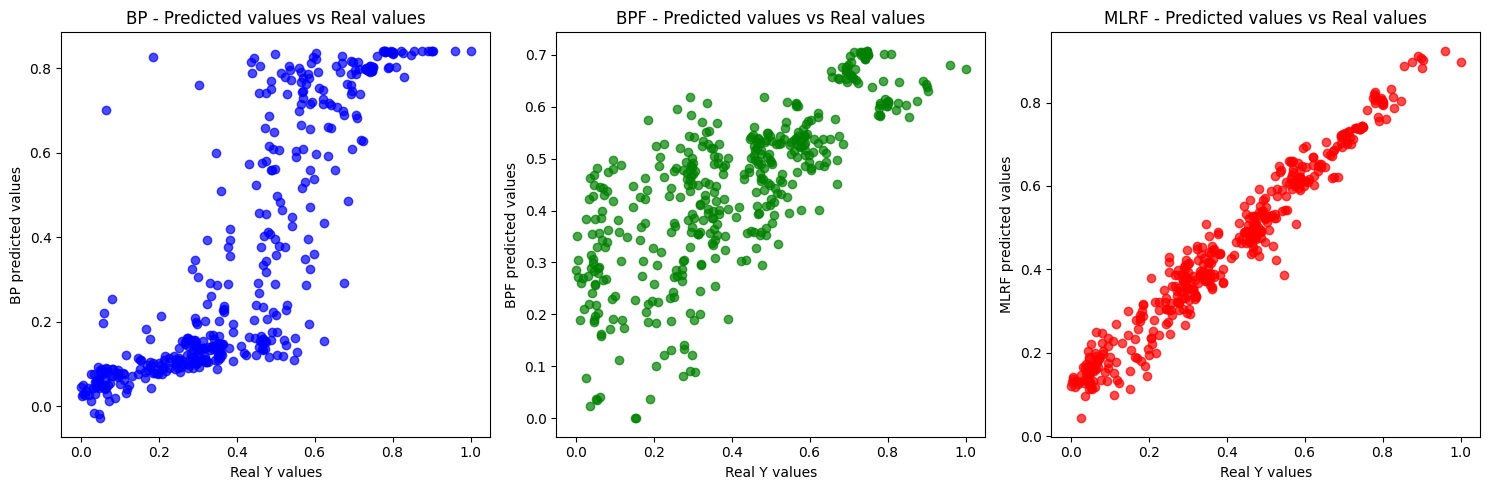

In [106]:
# Create a figure and axes for the plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns of plots

# Scatter plot 1
axs[0].scatter(y_test, bp_predictions, color='blue', alpha=0.7)
axs[0].set_title("BP - Predicted values vs Real values")
axs[0].set_xlabel("Real Y values")
axs[0].set_ylabel("BP predicted values")

# Scatter plot 2
axs[1].scatter(y_test, bpf_predictions, color='green', alpha=0.7)
axs[1].set_title("BPF - Predicted values vs Real values")
axs[1].set_xlabel("Real Y values")
axs[1].set_ylabel("BPF predicted values")

# Scatter plot 3
axs[2].scatter(y_test, mlrf_predictions, color='red', alpha=0.7)
axs[2].set_title("MLRF - Predicted values vs Real values")
axs[2].set_xlabel("Real Y values")
axs[2].set_ylabel("MLRF predicted values")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Error evolution

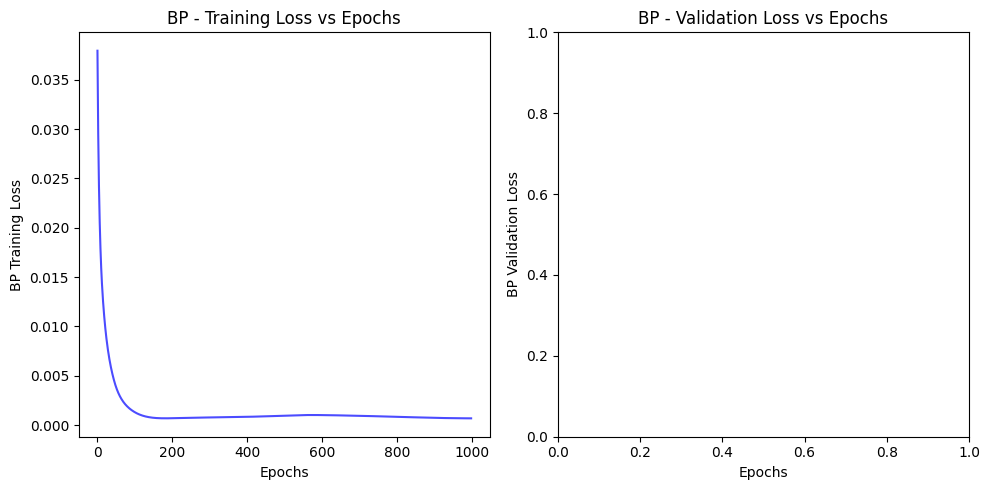

In [94]:
# Create a figure and axes for the plots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 3 columns of plots

# Training loss
bp_training_loss = bp_nn.loss_epochs()
axs[0].plot(range((1000)), bp_training_loss[:1000], color='blue', alpha=0.7)
axs[0].set_title("BP - Training Loss vs Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("BP Training Loss")

# Validation loss
# bp_validation_loss = 0
# axs[1].plot(range((5000)), bp_validation_loss[:5000], color='blue', alpha=0.7)
axs[1].set_title("BP - Validation Loss vs Epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("BP Validation Loss")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Results

### Data obtained from the tests done with BP model

| Test nº | Number of layers |  Layer Structure | Num epochs | Learning Rate | Momentum | Activation function |     MAPE     |     MAE     |     MSE     |
|:-------:|:----------------:|:----------------:|:----------:|:-------------:|:--------:|:-------------------:|:------------:|:-----------:|:-----------:|
|    1    |         3        |    [16, 4, 1]    |   100000   |     0.001     |   0.001  |         tanh        | 7.123403e+11 | 5.062585e-2 | 2.717239e-3 |
|    2    |         4        |   [16, 8, 4, 1]  |    1000    |     0.001     |   0.001  |         relu        | 6.239873e+11 | 7.014470e-2 | 5.567292e-3 |
|    3    |         5        | [16, 8, 4, 2, 1] |    1000    |      0.01     |   0.01   |        linear       | 7.582159e+11 | 5.796016e-2 | 4.178040e-3 |
|    4    |         3        |    [16, 4, 1]    |    1000    |     0.001     |   0.001  |         tanh        | 5.895478e+11 | 6.132290e-2 | 4.673645e-3 |
|    5    |         3        |    [16, 4, 1]    |    1000    |     0.001     |   0.001  |        linear       | 3.589370e+11 | 4.678564e-2 | 2.941892e-3 |

### Analysis of the parameters used

##### Learning rate and momentum

After some tests (not included in the previous table) it could be confirmed that using higher learning rates and momentus made the results much much worse. In the following table the results of one test done with higher parameters are exposed. As a result the errors are increased around ten times. So, keeping the learning rate and momentum low seems to be the best option

| Number of layers |  Layer Structure | Num epochs | Learning Rate | Momentum | Activation function |     MAPE     |     MAE     |     MSE     |
|:----------------:|:----------------:|:----------:|:-------------:|:--------:|:-------------------:|:------------:|:-----------:|:-----------:|
|         3        |    [16, 4, 1]    |    1000    |      0.1      |    0.1   |         tanh        | 4.926861e+11 | 1.344565e-1 | 2.941442e-2 |



##### Activation function

From the activation function point of view it seems that linear or tanh tends to have better results as in the same conditions the MAPE and MAE are lower for linear and the MSE is lower for tanh.

##### Error

With 3 layers, a learning rate of 0.001, and the tanh activation function, the test 1 achieved the lowest MAE and MSE, indicating good performance. If we compare it with the test 4 that uses the same parameters but less number of epochs the performance is better. From this test can be deduced that a bigger number of epochs tends to reduce the error. From the training and validation loss plots can be seen that the value after some epochs tends to stabilize and the reduction after each epoch is reduced, but in any case is always decreasing.

###### Test 1

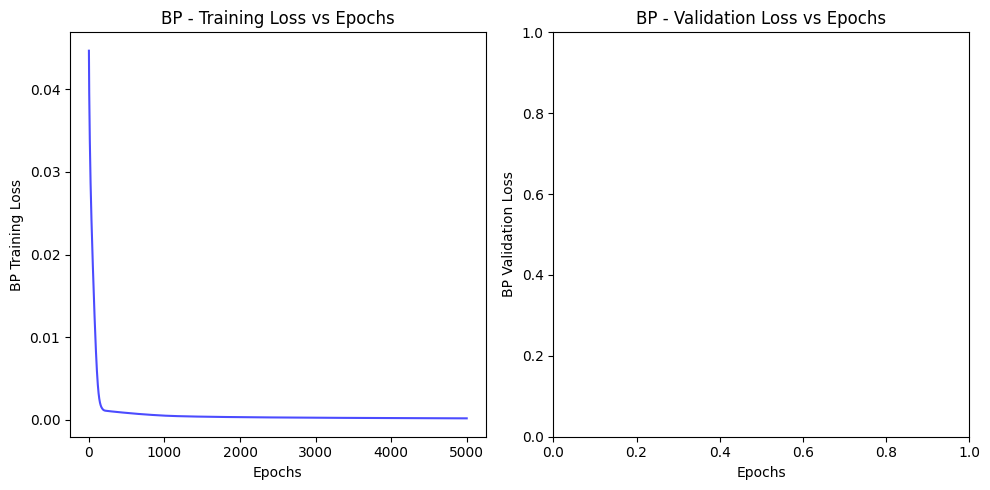

###### Test 2

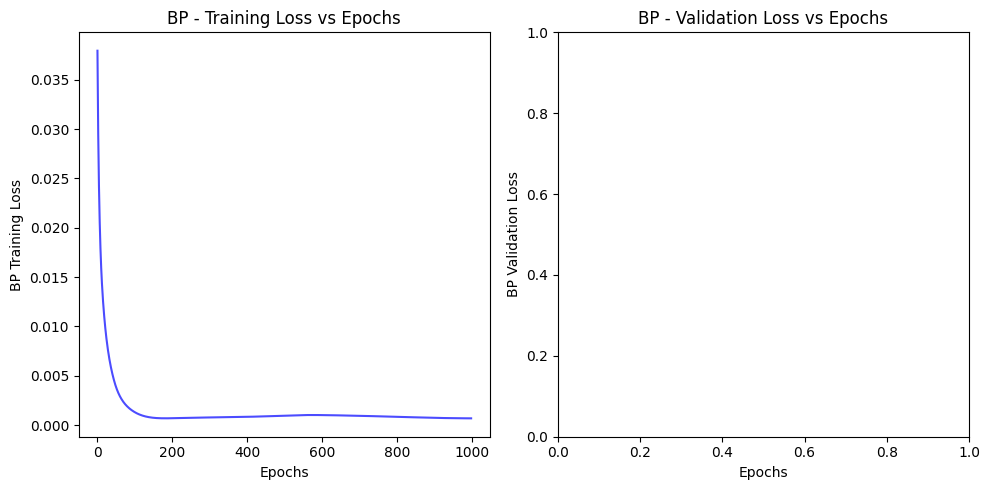

###### Test 3

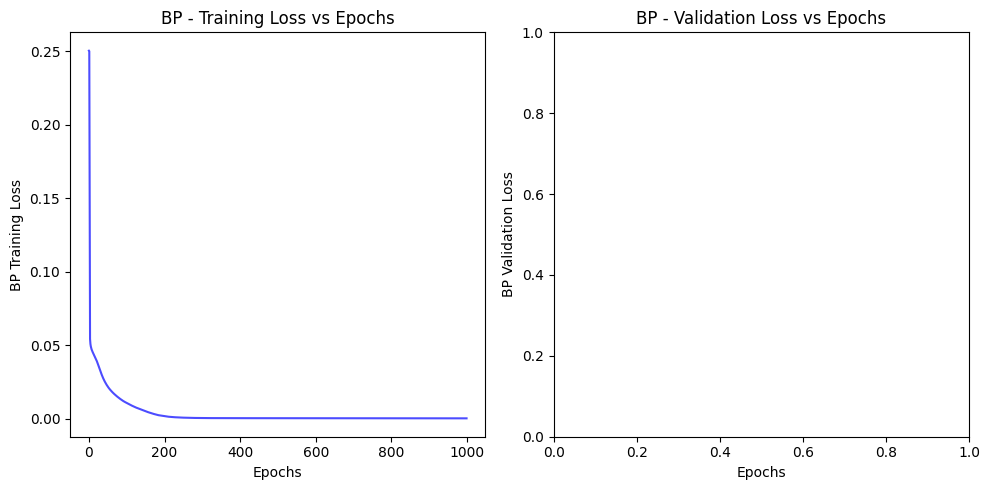

### Analysis of the results of the comaparison with other models

This test is the best as the scatter plot is closer to the diagonal. This means that the predicted values are closer to the real ones. This affirmation agrees what was said before, that the Test 1 achieved the best MAE and MSE errors and this is another indicator that outperforms the rest of the tests done.

#### Test number 1 comaprison with other models

The parameters used for the 3 models are the following ones:

|   Test  | Number of layers |  Layer Structure | Num epochs | Learning Rate | Momentum | Activation function |
|:-------:|:----------------:|:----------------:|:----------:|:-------------:|:--------:|:-------------------:|
|    BP   |         3        |    [16, 4, 1]    |   100000   |     0.001     |   0.001  |         tanh        |
|    BP-F |         3        |    [16, 4, 1]    |   10000    |     0.001     |   0.001  |         relu        |
|    MLR-R|         3        |    [16, 4, 1]    |   10000   |      0.001     |   0.001  |         relu        |

And the quality results are the following ones

|  Test |     MAPE     |     MAE     |     MSE     |
|:-----:|:------------:|:-----------:|:-----------:|
|  BP   | 7.123403e+11 | 5.062585e-2 | 2.717239e-3 |
|  BP-F | 6.572347e+11 | 5.234516e-2 | 3.462514e-3 |
| MLR-F | 1.568601e+12 | 6.542944e-2 | 7.089106e-3 |


##### Scatter plot predicted vs real values - BP vs BP-F vs MLR-R

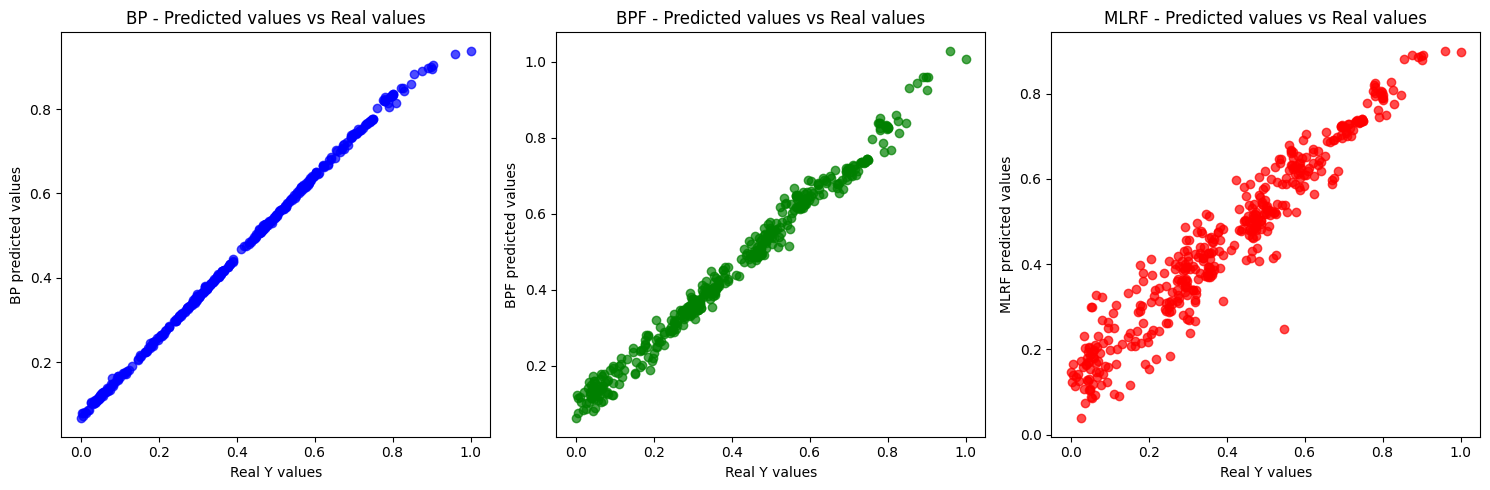


#### Test number 2

The parameters used for the 3 models are the following ones:

|   Test  | Number of layers |  Layer Structure | Num epochs | Learning Rate | Momentum | Activation function |
|:-------:|:----------------:|:----------------:|:----------:|:-------------:|:--------:|:-------------------:|
|    BP   |         3        |  [16, 8, 4, 1]   |   100000   |     0.001     |   0.001  |         relu        |
|    BP-F |         3        |    [16, 4, 1]    |   10000    |     0.001     |   0.001  |         relu        |
|    MLR-R|         3        |    [16, 4, 1]    |   10000   |      0.001     |   0.001  |         relu        |

And the quality results are the following ones

|  Test |     MAPE     |     MAE     |     MSE     |
|:-----:|:------------:|:-----------:|:-----------:|
|  BP   | 6.239873e+11 | 7.014470e-2 | 5.567292e-3 |
|  BP-F | 6.572347e+11 | 5.234516e-2 | 3.462514e-3 |
| MLR-F | 1.568601e+12 | 6.542944e-2 | 7.089106e-3 |

##### Scatter plot predicted vs real values - BP vs BP-F vs MLR-R

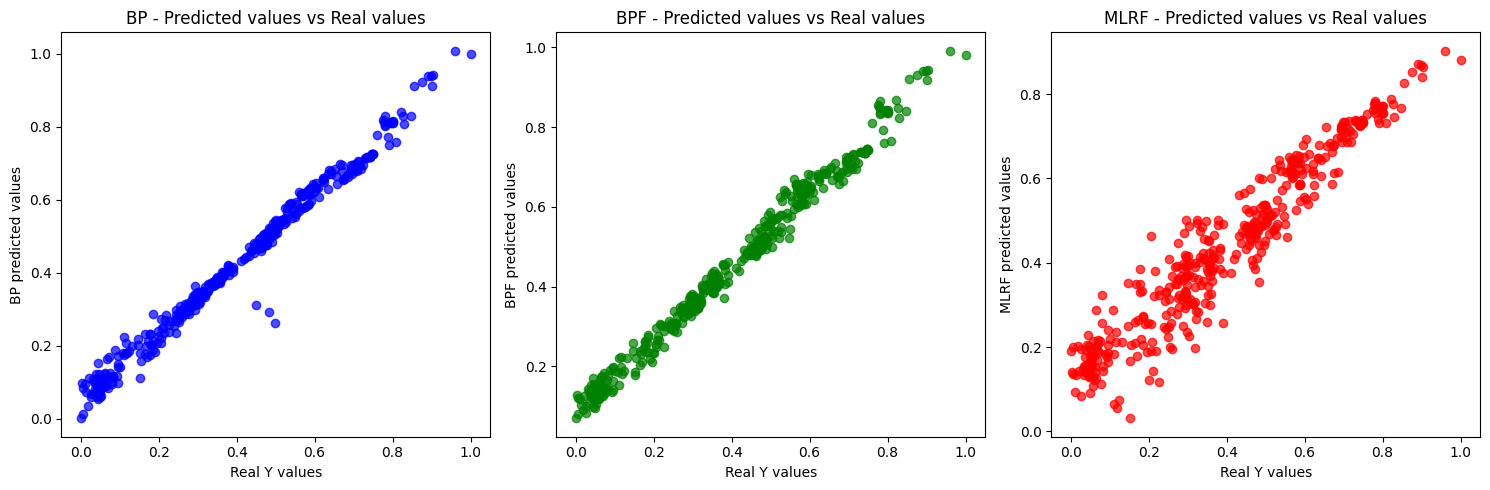

#### Test number 3

The parameters used for the 3 models are the following ones:

|   Test  | Number of layers |  Layer Structure | Num epochs | Learning Rate | Momentum | Activation function |
|:-------:|:----------------:|:----------------:|:----------:|:-------------:|:--------:|:-------------------:|
|    BP   |         3        |    [16, 4, 1]    |   1000    |     0.001     |   0.001  |         relu        |
|    BP-F |         3        |    [16, 4, 1]    |   1000    |     0.001     |   0.001  |         relu        |
|    MLR-R|         3        |    [16, 4, 1]    |   1000    |     0.001     |   0.001  |         relu        |

And the quality results are the following ones

|  Test |     MAPE     |     MAE     |     MSE     |
|:-----:|:------------:|:-----------:|:-----------:|
|  BP   | 1.363540e+11 | 4.804471e-2 | 2.914347e-3 |
|  BP-F | 3.043404e+12 | 1.250835e-1 | 2.587732e-2 |
| MLR-F | 1.272706e+12 | 5.562976e-2 | 4.985312e-3 |

##### Scatter plot predicted vs real values - BP vs BP-F vs MLR-R

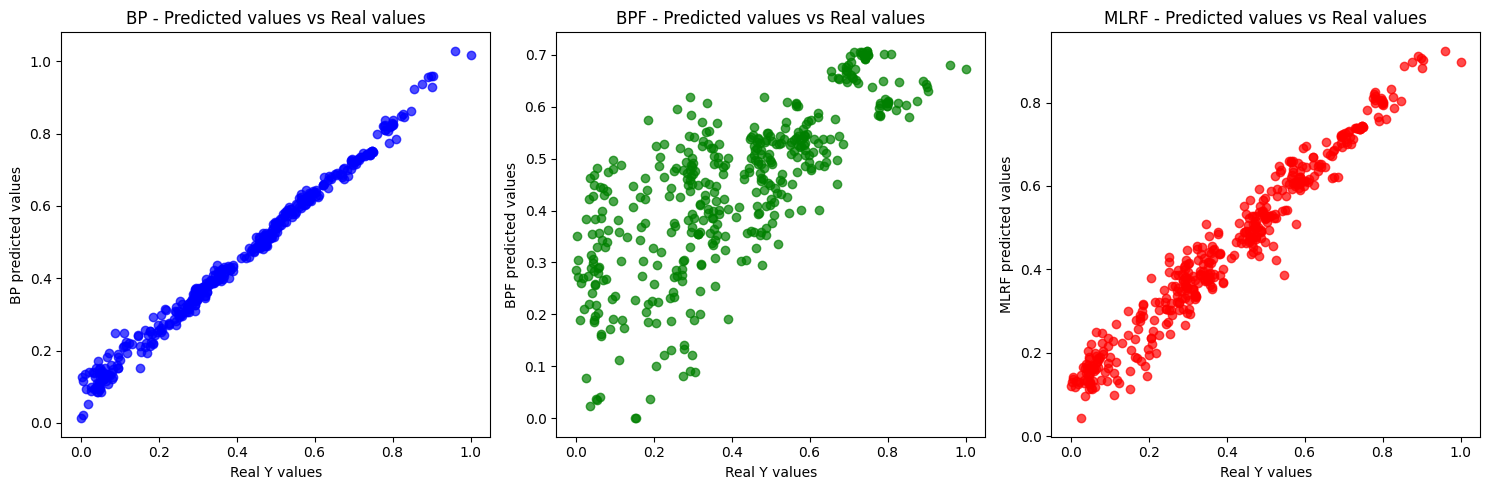